# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [2]:
import pandas as pd

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [3]:
cast = pd.read_csv('/Users/nicogonzalez/Desktop/Archive/cast.csv')
release_dates = pd.read_csv('/Users/nicogonzalez/Desktop/Archive/release_dates.csv')
titles = pd.read_csv('/Users/nicogonzalez/Desktop/Archive/titles.csv')

In [4]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB


In [5]:
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443485 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [6]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226012 non-null  object
 1   year    226013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


# 2. How many movies have the title North by Northwest

In [7]:
len(titles[titles['title'] == 'North by Northwest'])


1

### 3. How many version of Hamlet are there, when was the first made? the last?

In [8]:
# Filter rows where the title is "Hamlet"
hamlet_data = titles[titles['title'] == 'Hamlet']

# Get the number of versions
num_hamlet_versions = hamlet_data.shape[0]

# Get the first and last release dates
first_hamlet_release = hamlet_data['year'].min()
last_hamlet_release = hamlet_data['year'].max()

print(f"Number of versions of 'Hamlet': {num_hamlet_versions}")
print(f"The first version of 'Hamlet' was released in: {first_hamlet_release}")
print(f"The last version of 'Hamlet' was released in: {last_hamlet_release}")



Number of versions of 'Hamlet': 20
The first version of 'Hamlet' was released in: 1910
The last version of 'Hamlet' was released in: 2017


### 4. List all the movies called Treasure Island from oldest to newest

In [9]:
# Filter rows where the title is "Treasure Island"
treasure_island_movies = titles[titles['title'] == 'Treasure Island']

# Sort the DataFrame by the 'year' column in ascending order
treasure_island_movies_sorted = treasure_island_movies.sort_values(by='year')

# Display the sorted DataFrame
treasure_island_movies_sorted


,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [10]:
# Count the number of movies for each specified year
movies_1950_count = titles[titles['year'] == 1950].shape[0]
movies_1980_count = titles[titles['year'] == 1980].shape[0]
movies_2000_count = titles[titles['year'] == 2000].shape[0]

print(f"Number of movies made in 1950: {movies_1950_count}")
print(f"Number of movies made in 1980: {movies_1980_count}")
print(f"Number of movies made in 2000: {movies_2000_count}")


Number of movies made in 1950: 1109
Number of movies made in 1980: 1750
Number of movies made in 2000: 2568


### 6. How big was the cast of Metropolis


In [11]:
# Filter rows where the title is "Metropolis" in the cast DataFrame
metropolis_cast = cast[cast['title'] == 'Metropolis']

# Get the number of entries in the cast DataFrame for "Metropolis"
metropolis_cast_size = metropolis_cast.shape[0]

print(f"The size of the cast for 'Metropolis' is: {metropolis_cast_size}")


The size of the cast for 'Metropolis' is: 33


### 7. How many roles for actors were there 1950's? 1990's

In [12]:
# Filter rows for the 1950s and count the roles
roles_1950s_count = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959) & (cast['type'] == 'actor')].shape[0]

# Filter rows for the 1990s and count the roles
roles_1990s_count = cast[(cast['year'] >= 1990) & (cast['year'] <= 1999) & (cast['type'] == 'actor')].shape[0]

print(f"Number of roles for actors in the 1950s: {roles_1950s_count}")
print(f"Number of roles for actors in the 1990s: {roles_1990s_count}")


Number of roles for actors in the 1950s: 153559
Number of roles for actors in the 1990s: 245713


### 8. How many roles for actors & actresses over time? Output should be a line graph

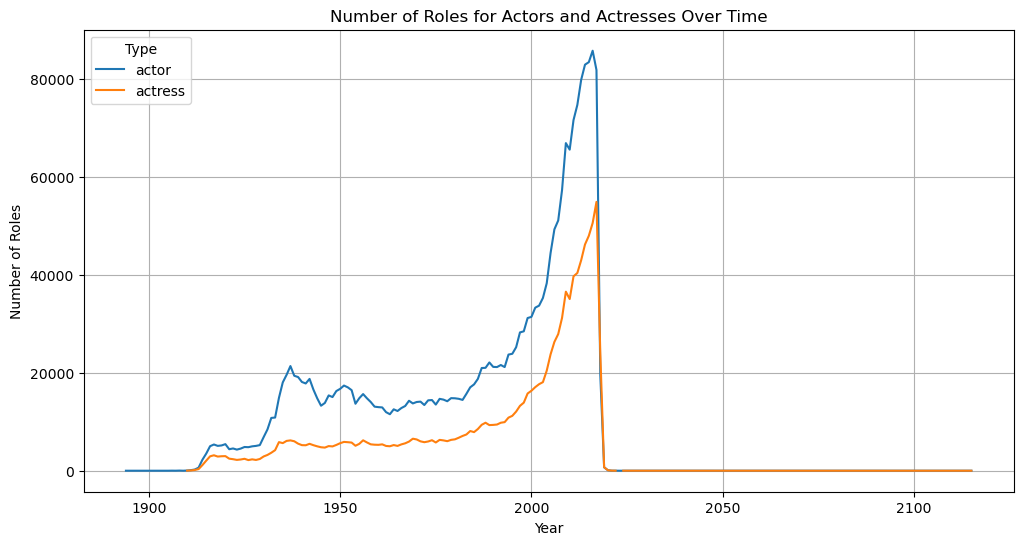

In [13]:
import matplotlib.pyplot as plt

# Filter rows for actors and actresses
roles_over_time = cast[cast['type'].isin(['actor', 'actress'])]

# Group by year and type, then count the number of roles
roles_over_time = roles_over_time.groupby(['year', 'type']).size().unstack()

# Plotting the line graph
roles_over_time.plot(kind='line', figsize=(12, 6))
plt.title('Number of Roles for Actors and Actresses Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend(title='Type', loc='upper left')
plt.grid(True)
plt.show()


### 9. How many "leading roles" were there in the 2000's?

In [14]:
# Filter rows for the 2000s and count the leading roles
leading_roles_2000s_count = cast[(cast['year'] >= 2000) & (cast['year'] <= 2009) & (cast['n'] == 1)].shape[0]

print(f"Number of leading roles in the 2000s: {leading_roles_2000s_count}")


Number of leading roles in the 2000s: 23593


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [15]:
# Filter rows for roles with no ranking in the 2000s and count them
no_ranking_2000s_count = cast[(cast['year'] >= 2000) & (cast['year'] <= 2009) & cast['n'].isnull()].shape[0]

# Filter rows for roles with no ranking in the 1950s and count them
no_ranking_1950s_count = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959) & cast['n'].isnull()].shape[0]

print(f"Number of roles with no ranking in the 2000s: {no_ranking_2000s_count}")
print(f"Number of roles with no ranking in the 1950s: {no_ranking_1950s_count}")


Number of roles with no ranking in the 2000s: 232037
Number of roles with no ranking in the 1950s: 95406


### 11. Plot the number of films made in each decade

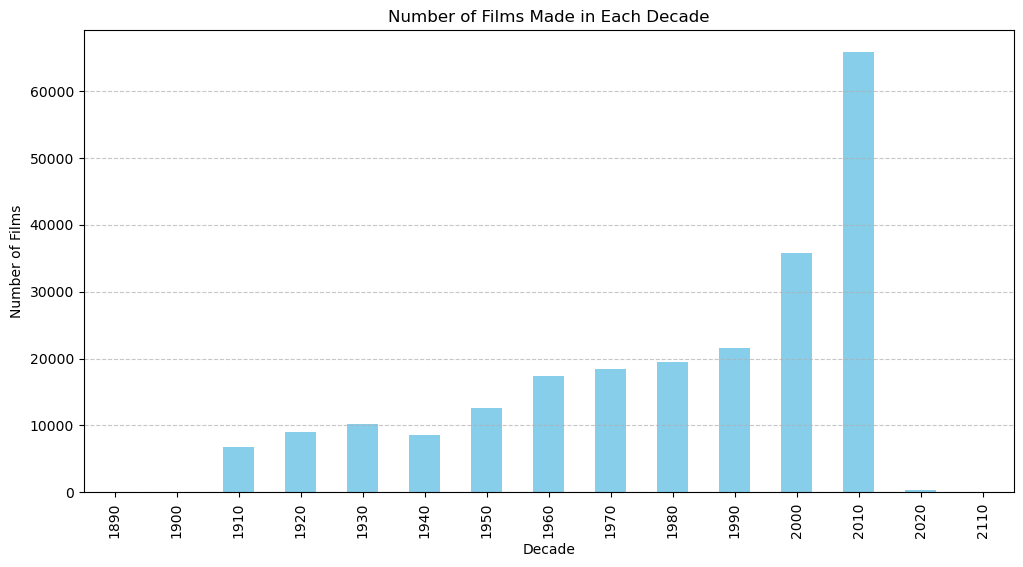

In [16]:
import matplotlib.pyplot as plt

# Create a new column for the decade
titles['decade'] = (titles['year'] // 10) * 10

# Group by decade and count the number of films
films_per_decade = titles.groupby('decade').size()

# Plotting the bar graph
films_per_decade.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Number of Films Made in Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 12. Plot the number of films with a Rustler character over time

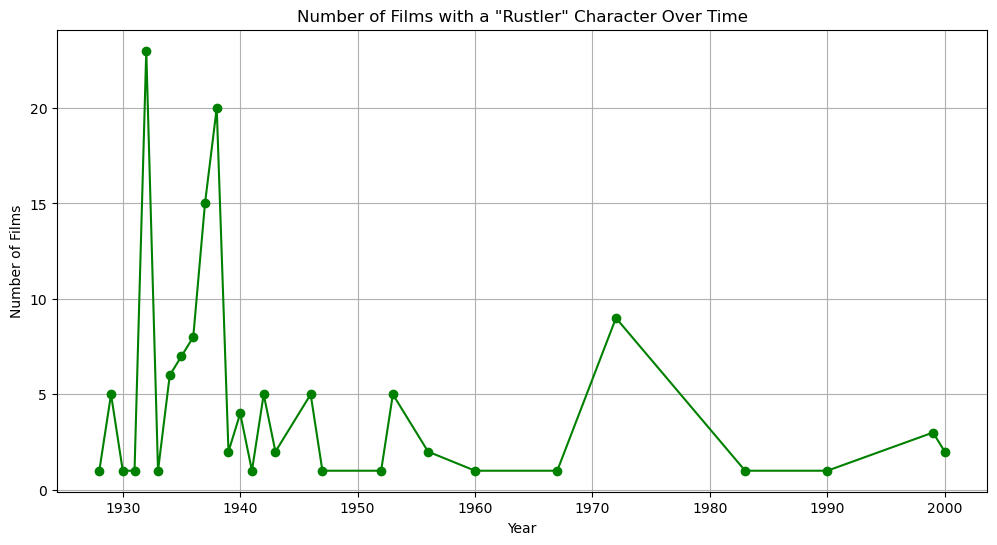

In [17]:
import matplotlib.pyplot as plt

# Filter rows for films with a "Rustler" character
rustler_movies = cast[cast['character'] == 'Rustler']

# Group by year and count the number of films
rustler_movies_over_time = rustler_movies.groupby('year').size()

# Plotting the line graph
rustler_movies_over_time.plot(kind='line', figsize=(12, 6), marker='o', color='green')
plt.title('Number of Films with a "Rustler" Character Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(True)
plt.show()


### 13. What are the top ten character names of all time?

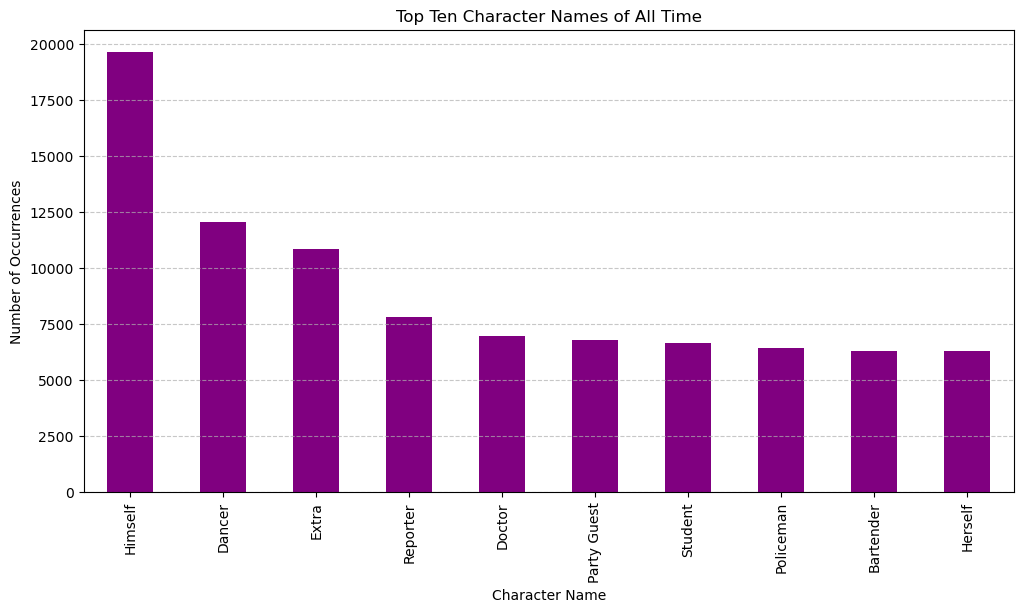

In [18]:
# Group by character name and count the occurrences
top_characters = cast['character'].value_counts().head(10)

# Plotting the bar graph
top_characters.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title('Top Ten Character Names of All Time')
plt.xlabel('Character Name')
plt.ylabel('Number of Occurrences')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 14. Which actor appeared in the most films in the 1990's decade?

In [19]:
# Filter rows for the 1990s
movies_1990s = cast[(cast['year'] >= 1990) & (cast['year'] <= 1999)]

# Group by actor and count the number of films
actor_appearances_1990s = movies_1990s['name'].value_counts()

# Get the actor with the most appearances
most_appearances_actor = actor_appearances_1990s.idxmax()
num_appearances = actor_appearances_1990s.max()

print(f"The actor who appeared in the most films in the 1990s is {most_appearances_actor} with {num_appearances} appearances.")


The actor who appeared in the most films in the 1990s is Shakti Kapoor with 143 appearances.


### 15. What are the top 10 roles that start with Science?

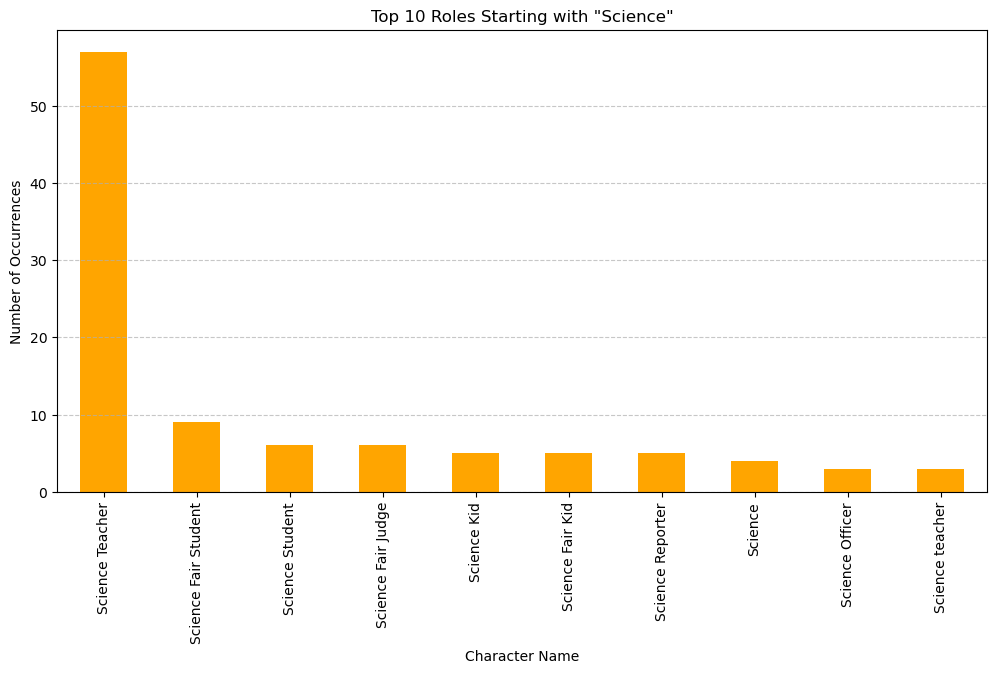

In [20]:
# Filter rows for roles starting with "Science" and without missing values
science_roles = cast[cast['character'].notna() & cast['character'].str.startswith('Science')]

# Group by character name and count the occurrences
top_science_roles = science_roles['character'].value_counts().head(10)

# Plotting the bar graph
top_science_roles.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title('Top 10 Roles Starting with "Science"')
plt.xlabel('Character Name')
plt.ylabel('Number of Occurrences')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### 16. What film has the largest cast

In [21]:
# Group by film title and count the unique names in the cast
largest_cast_film = cast.groupby('title')['name'].nunique().idxmax()

# Display the film with the largest cast
print(f"The film with the largest cast is: {largest_cast_film}")


The film with the largest cast is: Around the World in 80 Days


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [22]:
# Group by film title and calculate the cast size for each film
film_cast_size = cast.groupby('title')['name'].nunique()

# Display descriptive statistics for cast size
cast_size_stats = film_cast_size.describe()
print(cast_size_stats)


count    168254.000000
mean         20.115855
std          23.607947
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1363.000000
Name: name, dtype: float64


### 18. How many films has Natalie Portman been in in each year throughout her career?

In [23]:
# Filter rows for Natalie Portman
natalie_portman_films = cast[cast['name'] == 'Natalie Portman']

# Group by year and count the number of films each year
natalie_portman_films_per_year = natalie_portman_films.groupby('year').size()

# Display the result
print(natalie_portman_films_per_year)


year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [24]:
# Filter rows for Natalie Portman and where she was either the top star (n == 1) or co-star (n <= 2)
natalie_portman_lead_co_star = cast[(cast['name'] == 'Natalie Portman') & (cast['n'].isin([1, 2]))]

# Group by year and count the number of films each year
natalie_portman_lead_co_star_per_year = natalie_portman_lead_co_star.groupby('year').size()

# Display the result
print(natalie_portman_lead_co_star_per_year)


year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64


### 20. Determine how many roles for actor or actress by decade. Plot the output 

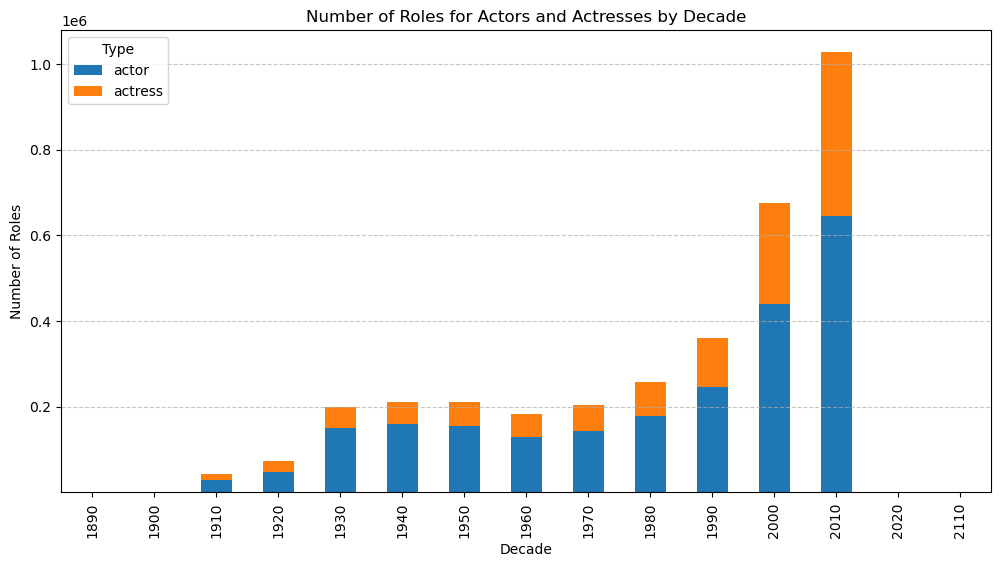

In [25]:
import matplotlib.pyplot as plt

# Create a new column for the decade
cast['decade'] = (cast['year'] // 10) * 10

# Filter rows for actors and actresses
roles_by_decade = cast[cast['type'].isin(['actor', 'actress'])]

# Group by decade and type, then count the number of roles
roles_by_decade = roles_by_decade.groupby(['decade', 'type']).size().unstack()

# Plotting the stacked bar graph
roles_by_decade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Roles for Actors and Actresses by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.legend(title='Type', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime format
release_dates['date'] = pd.to_datetime(release_dates['date'], errors='coerce')

# Extract day of the week and month from the 'date' column
release_dates['day_of_week'] = release_dates['date'].dt.day_name()
release_dates['month'] = release_dates['date'].dt.month_name()

# Create a pivot table to count the number of releases for each day of the week and month
pivot_table_day = pd.pivot_table(release_dates, values='title', index='day_of_week', aggfunc='count', fill_value=0)
pivot_table_month = pd.pivot_table(release_dates, values='title', index='month', aggfunc='count', fill_value=0)

# Display the pivot tables
print("Number of Releases by Day of the Week:")
print(pivot_table_day)
print("\nNumber of Releases by Month:")
print(pivot_table_month)


Number of Releases by Day of the Week:
              title
day_of_week        
Friday       163174
Monday        37210
Saturday      31331
Sunday        15823
Thursday     125746
Tuesday       16762
Wednesday     53439

Number of Releases by Month:
           title
month           
April      37674
August     35011
December   39096
February   36307
January    39412
July       31421
June       32704
March      40257
May        35449
November   38200
October    40204
September  37750


### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

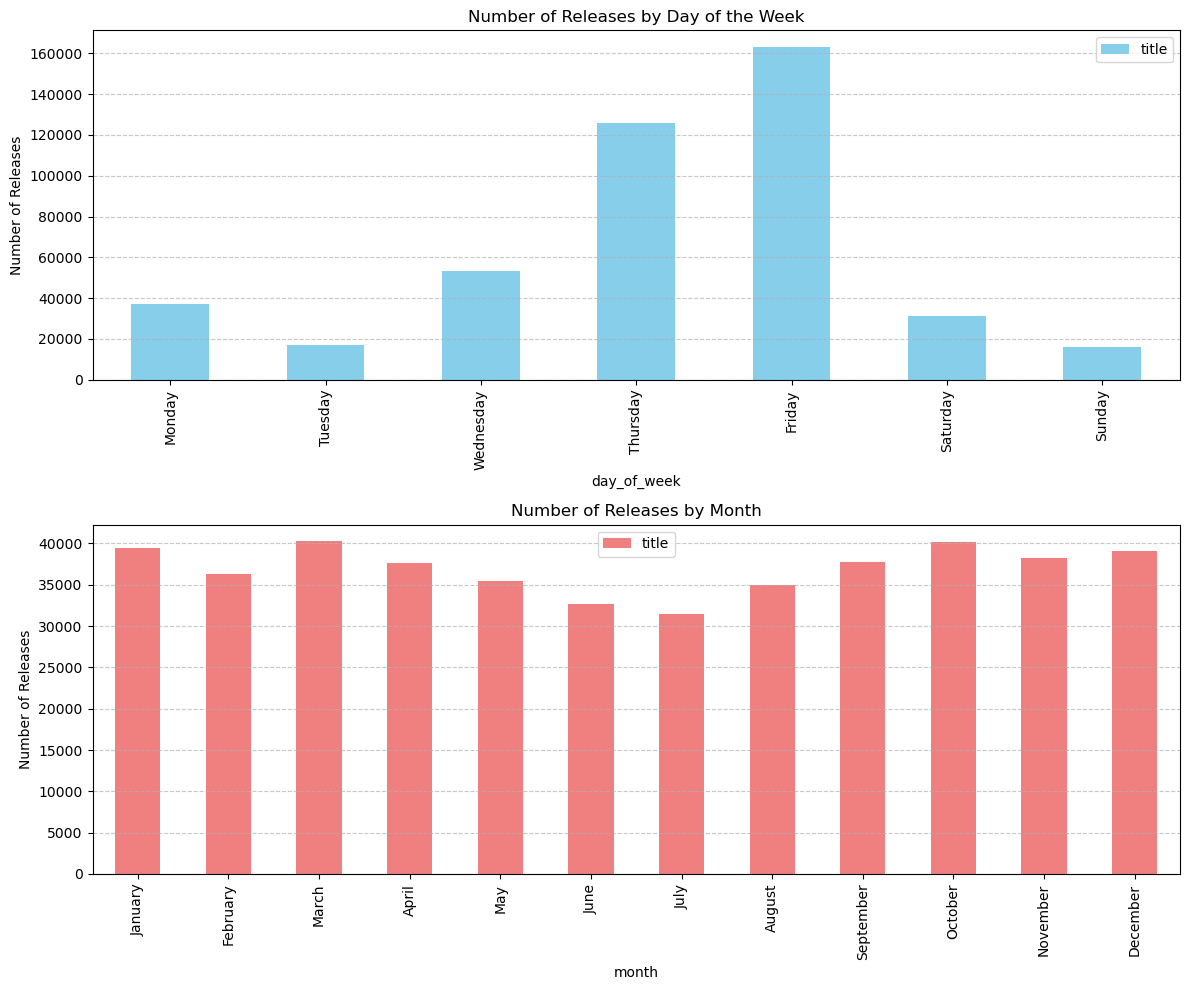

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Convert 'date' column to datetime format
release_dates['date'] = pd.to_datetime(release_dates['date'], errors='coerce')

# Extract day of the week and month from the 'date' column
release_dates['day_of_week'] = release_dates['date'].dt.day_name()
release_dates['month'] = release_dates['date'].dt.month_name()

# Create a pivot table to count the number of releases for each day of the week and month
pivot_table_day = pd.pivot_table(release_dates, values='title', index='day_of_week', aggfunc='count', fill_value=0)
pivot_table_month = pd.pivot_table(release_dates, values='title', index='month', aggfunc='count', fill_value=0)

# Reorder days of the week
day_order = list(calendar.day_name)
pivot_table_day = pivot_table_day.reindex(day_order)

# Reorder months
month_order = list(calendar.month_name)[1:]  # exclude the empty string at index 0
pivot_table_month = pivot_table_month.reindex(month_order)

# Plotting bar graphs
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

pivot_table_day.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Number of Releases by Day of the Week')
axes[0].set_ylabel('Number of Releases')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

pivot_table_month.plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Number of Releases by Month')
axes[1].set_ylabel('Number of Releases')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### 23. What films did actors in Star Wars go on to appear in? 

In [28]:
# Assuming star_wars_actors_list is a list of Star Wars actors
star_wars_actors_list = ['Mark Hamill', 'Harrison Ford', 'Carrie Fisher', ...]

# Filter the cast DataFrame for actors in Star Wars
star_wars_actors_films = cast[cast['name'].isin(star_wars_actors_list)]

# Display the films they went on to appear in
print(star_wars_actors_films[['name', 'title']])


                  name                              title
684011   Harrison Ford                                 42
684012   Harrison Ford                 A Time for Killing
684013   Harrison Ford                      Air Force One
684014   Harrison Ford                  American Graffiti
684015   Harrison Ford  Anchorman 2: The Legend Continues
...                ...                                ...
2641038  Carrie Fisher                       Undiscovered
2641039  Carrie Fisher            When Harry Met Sally...
2641040  Carrie Fisher                    White Lightnin'
2641041  Carrie Fisher                         Wonderland
2641042  Carrie Fisher                         Wonderwell

[135 rows x 2 columns]
